In [1]:
import sys
from PIL import Image
import glob
import os
import random
import imageio

In [3]:
image_folder = "Nexus_Image_Iterator/"
final_gif_name = "colloboartion_grid_01"
final_pieces = glob.glob(image_folder+"*_final_*.png")
grid_size = 9

widths = []
heights = []

for i in range(len(final_pieces)):
    im = Image.open(final_pieces[i])
    widths.append(im.size[0])
    heights.append(im.size[1])
    
w = min(heights) 
h = min(widths) 

# resize loop

for i in range(len(final_pieces)):
    im = Image.open(final_pieces[i])
    if im.size[0] != w or im.size[1] != h:
        wpercent = (w/float(im.size[0]))
        hsize = int((float(im.size[1])*float(wpercent)))
        img = im.resize((w,hsize), Image.ANTIALIAS)
        img.save(final_pieces[i].replace(".jpg", "").replace(".png", "") + str(w) + '_resized.png') 
        final_pieces[i] = final_pieces[i].replace(".jpg", "").replace(".png", "") + str(w) + '_resized.png'
        
# create gif folder and subdirectories
os.mkdir(final_gif_name)

In [5]:
w, h

(676, 676)

In [7]:
float(w/2)

338.0

In [24]:
676*.75

507.0

In [4]:
image_folder = "Nexus_Image_Iterator/more_compressed"

In [11]:
checker_grid = []

odds_one_row = [1 if x%2==0 else 0 for x in range(grid_size)]
even_one_row = [0 if x%2==0 else 1 for x in range(grid_size)]
print(odds_one_row)

for i in range(grid_size):
    if i%2==0:
        checker_grid.append(odds_one_row)
    else:
        checker_grid.append(even_one_row)


checker_grid

[1, 0, 1, 0, 1, 0, 1, 0, 1]


[[1, 0, 1, 0, 1, 0, 1, 0, 1],
 [0, 1, 0, 1, 0, 1, 0, 1, 0],
 [1, 0, 1, 0, 1, 0, 1, 0, 1],
 [0, 1, 0, 1, 0, 1, 0, 1, 0],
 [1, 0, 1, 0, 1, 0, 1, 0, 1],
 [0, 1, 0, 1, 0, 1, 0, 1, 0],
 [1, 0, 1, 0, 1, 0, 1, 0, 1],
 [0, 1, 0, 1, 0, 1, 0, 1, 0],
 [1, 0, 1, 0, 1, 0, 1, 0, 1]]

In [23]:
checker_grid_alt = []

# odds_one_row = [1 if x%2==0 else 0 for x in range(grid_size)]
# even_one_row = [0 if x%2==0 else 1 for x in range(grid_size)]
# print(odds_one_row)

for i in range(grid_size):
    if i%2==1:
        checker_grid_alt.append(odds_one_row)
    else:
        checker_grid_alt.append(even_one_row)


checker_grid_alt

[[0, 1, 0, 1, 0, 1, 0, 1, 0],
 [1, 0, 1, 0, 1, 0, 1, 0, 1],
 [0, 1, 0, 1, 0, 1, 0, 1, 0],
 [1, 0, 1, 0, 1, 0, 1, 0, 1],
 [0, 1, 0, 1, 0, 1, 0, 1, 0],
 [1, 0, 1, 0, 1, 0, 1, 0, 1],
 [0, 1, 0, 1, 0, 1, 0, 1, 0],
 [1, 0, 1, 0, 1, 0, 1, 0, 1],
 [0, 1, 0, 1, 0, 1, 0, 1, 0]]

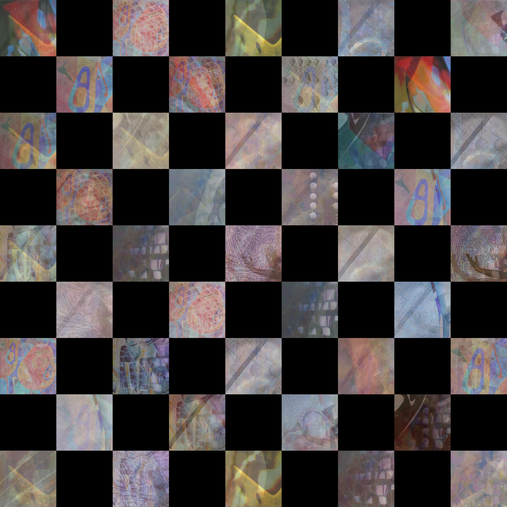

In [25]:
def create_single_grid(matrix, resized_image_list, image_suffix, folder, grid_size=grid_size):
    images = [Image.open(x) for x in resized_image_list[0:grid_size*grid_size+1]]

    widths, heights = zip(*(i.size for i in images))

    # assuming same size images
    total_width = widths[0]*grid_size
    total_height = heights[0]*grid_size

    new_im = Image.new('RGB', (total_width, total_height))

    x_offset = 0
    y_offset = 0
    x_placement = 0
    y_placement = 0
    image_list_num = 0
    
    for i in range((grid_size)**2+1):
        if matrix[x_placement][y_placement] == 1:
            new_im.paste(images[image_list_num], (x_offset,y_offset))
            image_list_num += 1
        x_offset += im.size[0]
        x_placement += 1
        if i != 0 and i%(grid_size) == 0:
            y_placement += 1
            y_offset += im.size[1]
        if i != 0 and (i+1)%(grid_size) == 0:
            x_offset = 0
            x_placement = 0


#     new_im.save(folder + image_suffix + '_.png')
    new_im = new_im.resize((507,507), Image.ANTIALIAS)
    new_im.save(folder + image_suffix + '_resized.png')
    return new_im

create_single_grid(checker_grid, final_pieces[0:81], "checkers_test_01", image_folder, grid_size=9)

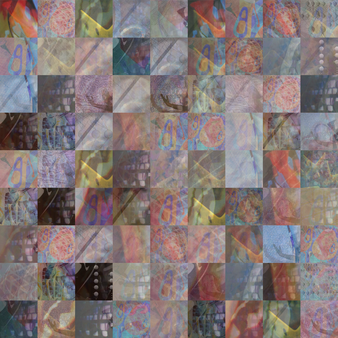

In [18]:
create_single_grid([[1 for x in range(9)] for y in range(9)], final_pieces, "all_test_01", image_folder, grid_size=9)

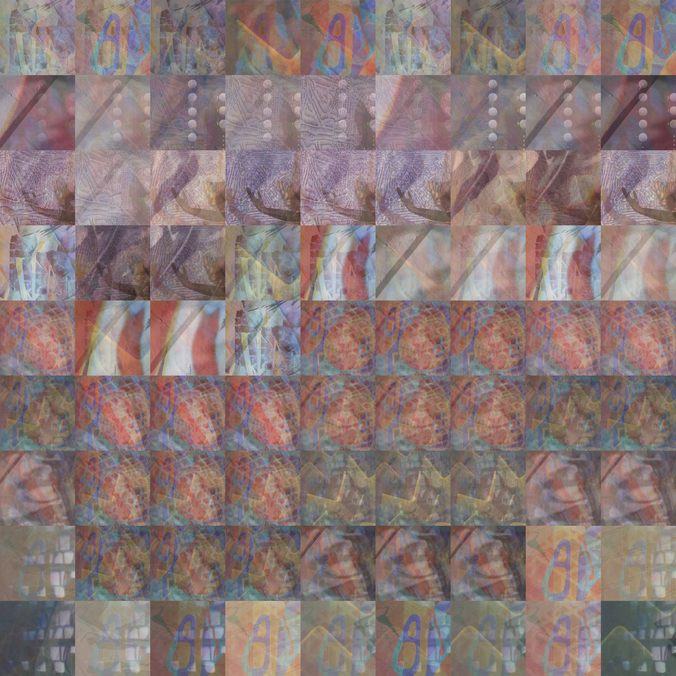

In [80]:
create_single_grid([[1 for x in range(9)] for y in range(9)], sorted(final_pieces), "all_test_01", image_folder, grid_size=9)

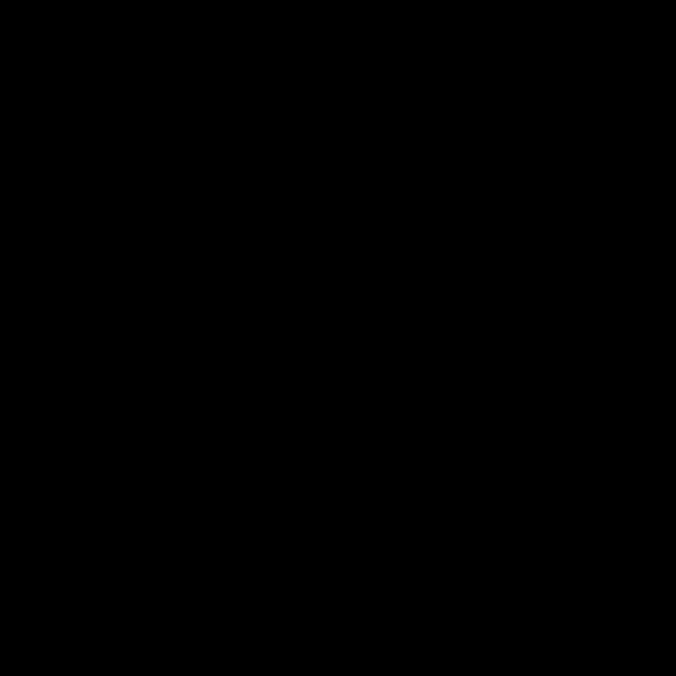

In [79]:
create_single_grid([[0 for x in range(9)] for y in range(9)], final_pieces, "blank_test_01", image_folder, grid_size=9)

In [68]:
[[1 for x in range(9)] for y in range(9)]

[[1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1]]

In [20]:
grid_designs = [
 [[0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]],

 [[0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]],
    

 [[0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]],
    
 [[0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]],
    
 [[0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]],
    
 [[0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]],

 [[0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]],

 [[0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]],

 [[0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]],

 [[0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]],
    
 [[0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]],
    
 [[0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]],
    
 [[0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0],
 [0, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]],
    
 [[0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0],
 [0, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0],
 [0, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]],
    
 [[0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0],
 [0, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0],
 [0, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]],
    
 [[0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0],
 [0, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0],
 [0, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]],
    
 [[0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0],
 [0, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0],
 [0, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]],
    
 [[0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0],
 [0, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0],
 [0, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]],

 [[0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0],
 [0, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 1],
 [0, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]],
    
 [[0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 1, 0],
 [0, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 1],
 [0, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]],

 [[0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 1, 0],
 [0, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 1],
 [0, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]],
    
 [[0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 1, 0],
 [0, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 1],
 [0, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]],
    
 [[0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 1, 0],
 [0, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 1],
 [0, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]],

 [[0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 1, 0, 0],
 [0, 1, 0, 1, 0, 1, 0, 1, 0],
 [0, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 1],
 [0, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]],
    
 [[0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 1, 0, 0],
 [0, 1, 0, 1, 0, 1, 0, 1, 0],
 [1, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 1],
 [0, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]],
    
[[0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 1, 0, 0],
 [0, 1, 0, 1, 0, 1, 0, 1, 0],
 [1, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 1],
 [1, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]],
    
[[0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 1, 0, 0],
 [0, 1, 0, 1, 0, 1, 0, 1, 0],
 [1, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 1],
 [1, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 1, 0],
 [0, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]],
    
[[0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 1, 0, 0],
 [0, 1, 0, 1, 0, 1, 0, 1, 0],
 [1, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 1],
 [1, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 1, 0],
 [0, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0]],
    
[[0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 1, 0, 0],
 [0, 1, 0, 1, 0, 1, 0, 1, 0],
 [1, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 1],
 [1, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 1, 0],
 [0, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0]],
    
[[0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 1, 0, 0],
 [0, 1, 0, 1, 0, 1, 0, 1, 0],
 [1, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 1],
 [1, 0, 1, 0, 1, 0, 1, 0, 1],
 [0, 0, 0, 1, 0, 1, 0, 1, 0],
 [0, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0]],

[[0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 1, 0, 0],
 [0, 1, 0, 1, 0, 1, 0, 1, 0],
 [1, 0, 1, 0, 1, 0, 1, 0, 1],
 [0, 0, 0, 1, 0, 1, 0, 0, 1],
 [1, 0, 1, 0, 1, 0, 1, 0, 1],
 [0, 0, 0, 1, 0, 1, 0, 1, 0],
 [0, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0]],
    
[[0, 0, 0, 0, 1, 1, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 1, 0, 0],
 [0, 1, 0, 1, 0, 1, 0, 1, 0],
 [1, 0, 1, 0, 1, 0, 1, 0, 1],
 [0, 0, 0, 1, 0, 1, 0, 0, 1],
 [1, 0, 1, 0, 1, 0, 1, 0, 1],
 [0, 0, 0, 1, 0, 1, 0, 1, 0],
 [0, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0]],

[[0, 0, 0, 1, 1, 1, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 1, 0, 0],
 [0, 1, 0, 1, 0, 1, 0, 1, 0],
 [1, 0, 1, 0, 1, 0, 1, 0, 1],
 [0, 0, 0, 1, 0, 1, 0, 0, 1],
 [1, 0, 1, 0, 1, 0, 1, 0, 1],
 [0, 0, 0, 1, 0, 1, 0, 1, 0],
 [0, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0]],

[[0, 0, 0, 1, 1, 1, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 1, 0, 0],
 [0, 1, 0, 1, 0, 1, 0, 1, 0],
 [1, 0, 1, 0, 1, 0, 1, 0, 1],
 [1, 0, 0, 1, 0, 1, 0, 0, 1],
 [1, 0, 1, 0, 1, 0, 1, 0, 1],
 [0, 0, 0, 1, 0, 1, 0, 1, 0],
 [0, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0]],
    
[[0, 0, 0, 1, 1, 1, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 1, 0, 0],
 [0, 1, 0, 1, 0, 1, 0, 1, 0],
 [1, 0, 1, 0, 1, 0, 1, 0, 1],
 [1, 0, 0, 1, 0, 1, 0, 0, 1],
 [1, 0, 1, 0, 1, 0, 1, 0, 1],
 [0, 1, 0, 1, 0, 1, 0, 1, 0],
 [0, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0]],

[[0, 0, 0, 1, 1, 1, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 1, 0, 0],
 [0, 1, 0, 1, 0, 1, 0, 1, 0],
 [1, 0, 1, 0, 1, 0, 1, 0, 1],
 [1, 0, 0, 1, 0, 1, 0, 0, 1],
 [1, 0, 1, 0, 1, 0, 1, 0, 1],
 [0, 1, 0, 1, 0, 1, 0, 1, 0],
 [0, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 1, 1, 0, 0, 0]],
    
[[0, 0, 0, 1, 1, 1, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 1, 0, 0],
 [0, 1, 0, 1, 0, 1, 0, 1, 0],
 [1, 0, 1, 0, 1, 0, 1, 0, 1],
 [1, 0, 0, 1, 0, 1, 0, 0, 1],
 [1, 0, 1, 0, 1, 0, 1, 0, 1],
 [0, 1, 0, 1, 0, 1, 0, 1, 0],
 [0, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 1, 1, 0, 0, 0]],
]

In [15]:
for i in range(len(grid_designs)):
    create_single_grid(grid_designs[i], final_pieces, "grid_sprial_test_"+str(i), image_folder, grid_size=9)

In [17]:
# folder + image_suffix + '_resized.png'
images_in_order = [image_folder + "grid_sprial_test_"+str(i)+'_resized.png' for i in range(len(grid_designs))]
with imageio.get_writer(final_gif_name + '_grid_sprial_test_composites.gif', mode='I') as writer:
    for filename in images_in_order:
        try:
            image = imageio.imread(filename)
            writer.append_data(image)
        except:
            print(filename)

In [20]:
back_forth_grid_designs = grid_designs + grid_designs[::-1]

for i in range(len(back_forth_grid_designs)):
    create_single_grid(back_forth_grid_designs[i], final_pieces, "back_forth_grid_"+str(i), image_folder, grid_size=9)
    
    
images_in_order = [image_folder + "back_forth_grid_"+str(i)+'_resized.png' for i in range(len(back_forth_grid_designs))]
with imageio.get_writer(final_gif_name + '_back_forth_grid_composites.gif', mode='I') as writer:
    for filename in images_in_order:
        try:
            image = imageio.imread(filename)
            writer.append_data(image)
        except:
            print(filename)

In [29]:
checkers = []

for i in range(20):
    if i%2==0:
        checkers.append(checker_grid)
    else:
        checkers.append(checker_grid_alt)

checkers[0:2]

[[[1, 0, 1, 0, 1, 0, 1, 0, 1],
  [0, 1, 0, 1, 0, 1, 0, 1, 0],
  [1, 0, 1, 0, 1, 0, 1, 0, 1],
  [0, 1, 0, 1, 0, 1, 0, 1, 0],
  [1, 0, 1, 0, 1, 0, 1, 0, 1],
  [0, 1, 0, 1, 0, 1, 0, 1, 0],
  [1, 0, 1, 0, 1, 0, 1, 0, 1],
  [0, 1, 0, 1, 0, 1, 0, 1, 0],
  [1, 0, 1, 0, 1, 0, 1, 0, 1]],
 [[0, 1, 0, 1, 0, 1, 0, 1, 0],
  [1, 0, 1, 0, 1, 0, 1, 0, 1],
  [0, 1, 0, 1, 0, 1, 0, 1, 0],
  [1, 0, 1, 0, 1, 0, 1, 0, 1],
  [0, 1, 0, 1, 0, 1, 0, 1, 0],
  [1, 0, 1, 0, 1, 0, 1, 0, 1],
  [0, 1, 0, 1, 0, 1, 0, 1, 0],
  [1, 0, 1, 0, 1, 0, 1, 0, 1],
  [0, 1, 0, 1, 0, 1, 0, 1, 0]]]

In [36]:
moving_picture_grids[0]

[0, 0, 0, 0, 0, 0, 0, 0, 0]

In [41]:
moving_picture_grids = [[[0 for x in range(9)] for y in range(9)]] + grid_designs + checkers + [[[1 for x in range(9)] for y in range(9)] for i in range(20)]  + grid_designs[::-1]


for i in range(len(moving_picture_grids)):
    print(i)
    create_single_grid(moving_picture_grids[i], final_pieces, "moving_picture_grid_"+str(i), image_folder, grid_size=9)
    
    
images_in_order = [image_folder + "moving_picture_grid_"+str(i)+'_resized.png' for i in range(len(moving_picture_grids))]
with imageio.get_writer(final_gif_name + '_moving_picture_grid_composites.gif', mode='I') as writer:
    for filename in images_in_order:
        try:
            image = imageio.imread(filename)
            writer.append_data(image)
        except:
            print(filename)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114


In [42]:
len(moving_picture_grids)

115

In [21]:
spiral_grids = grid_designs + [
[[0, 0, 0, 1, 1, 1, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 1, 0, 0],
 [0, 1, 0, 1, 0, 1, 0, 1, 0],
 [1, 0, 1, 0, 1, 0, 1, 0, 1],
 [1, 0, 0, 1, 0, 1, 0, 0, 1],
 [1, 0, 1, 0, 1, 0, 1, 0, 1],
 [0, 1, 0, 1, 0, 1, 0, 1, 0],
 [0, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 1, 1, 0, 0, 0]],

[[0, 0, 0, 1, 1, 1, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 1, 0, 0],
 [0, 1, 0, 1, 0, 1, 0, 1, 0],
 [1, 1, 1, 0, 1, 0, 1, 0, 1],
 [1, 1, 0, 1, 0, 1, 0, 0, 1],
 [1, 1, 1, 0, 1, 0, 1, 0, 1],
 [0, 1, 0, 1, 0, 1, 0, 1, 0],
 [0, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 1, 1, 0, 0, 0]],
    
[[0, 0, 0, 1, 1, 1, 0, 0, 0],
 [0, 0, 1, 1, 1, 1, 1, 0, 0],
 [0, 1, 0, 1, 0, 1, 0, 1, 0],
 [1, 1, 1, 0, 1, 0, 1, 0, 1],
 [1, 1, 0, 1, 0, 1, 0, 0, 1],
 [1, 1, 1, 0, 1, 0, 1, 0, 1],
 [0, 1, 0, 1, 0, 1, 0, 1, 0],
 [0, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 1, 1, 0, 0, 0]],
    
[[0, 0, 0, 1, 1, 1, 0, 0, 0],
 [0, 0, 1, 1, 1, 1, 1, 0, 0],
 [0, 1, 0, 1, 0, 1, 0, 1, 0],
 [1, 1, 1, 0, 1, 0, 1, 1, 1],
 [1, 1, 0, 1, 0, 1, 0, 1, 1],
 [1, 1, 1, 0, 1, 0, 1, 1, 1],
 [0, 1, 0, 1, 0, 1, 0, 1, 0],
 [0, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 1, 1, 0, 0, 0]],
    
[[0, 0, 0, 1, 1, 1, 0, 0, 0],
 [0, 0, 1, 1, 1, 1, 1, 0, 0],
 [0, 1, 0, 1, 0, 1, 0, 1, 0],
 [1, 1, 1, 0, 1, 0, 1, 1, 1],
 [1, 1, 0, 1, 0, 1, 0, 1, 1],
 [1, 1, 1, 0, 1, 0, 1, 1, 1],
 [0, 1, 0, 1, 0, 1, 0, 1, 0],
 [0, 0, 1, 1, 1, 1, 1, 0, 0],
 [0, 0, 0, 1, 1, 1, 0, 0, 0]],
    
[[0, 0, 0, 1, 1, 1, 0, 0, 0],
 [0, 0, 1, 1, 1, 1, 1, 0, 0],
 [0, 1, 1, 1, 0, 1, 0, 1, 0],
 [1, 1, 1, 0, 1, 0, 1, 1, 1],
 [1, 1, 1, 1, 0, 1, 0, 1, 1],
 [1, 1, 1, 0, 1, 0, 1, 1, 1],
 [0, 1, 1, 1, 0, 1, 0, 1, 0],
 [0, 0, 1, 1, 1, 1, 1, 0, 0],
 [0, 0, 0, 1, 1, 1, 0, 0, 0]],
    
[[0, 0, 0, 1, 1, 1, 0, 0, 0],
 [0, 0, 1, 1, 1, 1, 1, 0, 0],
 [0, 1, 1, 1, 1, 1, 1, 1, 0],
 [1, 1, 1, 0, 1, 0, 1, 1, 1],
 [1, 1, 1, 1, 0, 1, 0, 1, 1],
 [1, 1, 1, 0, 1, 0, 1, 1, 1],
 [0, 1, 1, 1, 0, 1, 0, 1, 0],
 [0, 0, 1, 1, 1, 1, 1, 0, 0],
 [0, 0, 0, 1, 1, 1, 0, 0, 0]],
    
[[0, 0, 0, 1, 1, 1, 0, 0, 0],
 [0, 0, 1, 1, 1, 1, 1, 0, 0],
 [0, 1, 1, 1, 1, 1, 1, 1, 0],
 [1, 1, 1, 0, 1, 0, 1, 1, 1],
 [1, 1, 1, 1, 0, 1, 1, 1, 1],
 [1, 1, 1, 0, 1, 0, 1, 1, 1],
 [0, 1, 1, 1, 0, 1, 1, 1, 0],
 [0, 0, 1, 1, 1, 1, 1, 0, 0],
 [0, 0, 0, 1, 1, 1, 0, 0, 0]],

[[0, 0, 0, 1, 1, 1, 0, 0, 0],
 [0, 0, 1, 1, 1, 1, 1, 0, 0],
 [0, 1, 1, 1, 1, 1, 1, 1, 0],
 [1, 1, 1, 0, 1, 0, 1, 1, 1],
 [1, 1, 1, 1, 0, 1, 1, 1, 1],
 [1, 1, 1, 0, 1, 0, 1, 1, 1],
 [0, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 0, 1, 1, 1, 1, 1, 0, 0],
 [0, 0, 0, 1, 1, 1, 0, 0, 0]],


[[0, 0, 0, 1, 1, 1, 0, 0, 0],
 [0, 0, 1, 1, 1, 1, 1, 0, 0],
 [0, 1, 1, 1, 1, 1, 1, 1, 0],
 [1, 1, 1, 0, 1, 0, 1, 1, 1],
 [1, 1, 1, 1, 0, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 0, 1, 1, 1],
 [0, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 0, 1, 1, 1, 1, 1, 0, 0],
 [0, 0, 0, 1, 1, 1, 0, 0, 0]],
    
[[0, 0, 0, 1, 1, 1, 0, 0, 0],
 [0, 0, 1, 1, 1, 1, 1, 0, 0],
 [0, 1, 1, 1, 1, 1, 1, 1, 0],
 [1, 1, 1, 1, 1, 0, 1, 1, 1],
 [1, 1, 1, 1, 0, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 0, 1, 1, 1],
 [0, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 0, 1, 1, 1, 1, 1, 0, 0],
 [0, 0, 0, 1, 1, 1, 0, 0, 0]],
    
[[0, 0, 0, 1, 1, 1, 0, 0, 0],
 [0, 0, 1, 1, 1, 1, 1, 0, 0],
 [0, 1, 1, 1, 1, 1, 1, 1, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 0, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 0, 1, 1, 1],
 [0, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 0, 1, 1, 1, 1, 1, 0, 0],
 [0, 0, 0, 1, 1, 1, 0, 0, 0]],
    
[[0, 0, 0, 1, 1, 1, 0, 0, 0],
 [0, 0, 1, 1, 1, 1, 1, 0, 0],
 [0, 1, 1, 1, 1, 1, 1, 1, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 0, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 0, 1, 1, 1, 1, 1, 0, 0],
 [0, 0, 0, 1, 1, 1, 0, 0, 0]],

[[0, 0, 0, 1, 1, 1, 0, 0, 0],
 [0, 0, 1, 1, 1, 1, 1, 0, 0],
 [0, 1, 1, 1, 1, 1, 1, 1, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 0, 1, 1, 1, 1, 1, 0, 0],
 [0, 0, 0, 1, 1, 1, 0, 0, 0]],
]


In [26]:
full_sprial_grids = spiral_grids + spiral_grids[::-1]

for i in range(len(full_sprial_grids)):
    print(i)
    create_single_grid(full_sprial_grids [i], final_pieces, "full_sprial_grids_507_"+str(i), image_folder, grid_size=9)
    
    
images_in_order = [image_folder + "full_sprial_grids_507_"+str(i)+'_resized.png' for i in range(len(full_sprial_grids))]
with imageio.get_writer(final_gif_name + '_full_sprial_grids_composites_smaller_507.gif', mode='I') as writer:
    for filename in images_in_order:
        try:
            image = imageio.imread(filename)
            writer.append_data(image)
        except:
            print(filename)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101


In [9]:
start_grid = [[0 for x in range(9)] for y in range(9)]
grids = [start_grid.copy()]

for i in range(10):
    grid = start_grid.copy()
    if i%2 ==0:
        grid[4+i//4][4+i//4] = 1
    else:
        grid[4+i//4][4+i//4] = 1
    
    print(start_grid)
    print("/n")
    grids.append(start_grid)

[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]
/n
[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]
/n
[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]
/n
[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [

In [10]:
grids[1]

[[0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [11]:
grids

[[[0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 1, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 1, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 1, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0]],
 [[0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 1, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 1, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 1, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0]],
 [[0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 1, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 1, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 1, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0]],
 [[0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 1, 0, 0, 0, 0],
  [0,